In [2]:
import numpy as np
import matplotlib.pyplot as plt

### Plotting results of 2021 100NS Short Interp Job - Nov 15, 2024

In [5]:
# Load antenna times from data directory
year = '2021'
instrument = '100MHz'
channel = 'NS'
datadir = '../test_data/'+year+'/'+instrument+'/'+channel+'/'
t_ant = np.load(datadir+'antsystime_'+year+'_'+instrument+'_'+channel+'.npy') # UNIX timestamp
lst_ant = np.load(datadir+'antlst_'+year+'_'+instrument+'_'+channel+'.npy') # LST

# Set the directory where results are stored
calibrator = 'short'
rslt_dir = '/scratch/s/sievers/lauriea/2021-100NS-short/'
verbose = True

freqarr, freqstep = np.linspace(0,250,4096,retstep=True) # array of frequency channels
freq_ind_min = np.arange(0,4095,103)
freq_ind_max = np.arange(102,4120,103)
freq_ind_max[-1] = 4095
# print(freq_ind_min)
# print(freq_ind_max)


# I have saved for each frequency interval:
# - the result of the interpolation over all antenna times
# - the error on the result of the interpolation for each antenna time
# - the calibrator power data that has been averaged within each calibration cycle
# - the standard deviation on the calibrator power data, computed from the scatter of the averaged data in each calibration cycle
# - the average time of each calibration cycle

short_interp = []
short_interp_err =  []
short_data_avgd = []
short_data_std = []
short_times_avgd = []

numfreqs=0

for i in range(40):
    
    findmin = freq_ind_min[i]
    findmax = freq_ind_max[i]
    
    if verbose == True: print('Loading range '+str(findmin)+'-'+str(findmax))
    
    # Open directory
    subdir = str(findmin)+'_'+str(findmax)
    
    # Load file
    # Interpolation
    rslt = np.load(rslt_dir+subdir+'/'+calibrator+'_'+subdir+'_rslt.npy').shape[0]
    print('+',rslt)
    numfreqs += rslt
    print(numfreqs)
    short_interp.append(np.load(rslt_dir+subdir+'/'+calibrator+'_'+subdir+'_rslt.npy'))
    short_interp_err.append(np.load(rslt_dir+subdir+'/'+calibrator+'_'+subdir+'_rslterr.npy'))
    
    # Data
    short_data_avgd.append(np.load(rslt_dir+subdir+'/'+calibrator+'_'+subdir+'_avgdata.npy'))
    short_data_std.append(np.load(rslt_dir+subdir+'/'+calibrator+'_'+subdir+'_avgdatastd.npy'))
    short_times_avgd.append(np.load(rslt_dir+subdir+'/'+calibrator+'_'+subdir+'_avgtime.npy'))
    
short_interp = np.concatenate(short_interp)
short_interp_err = np.concatenate(short_interp_err)
short_data_avgd = np.concatenate(short_data_avgd)
short_data_std = np.concatenate(short_data_std)
short_times_avgd = np.concatenate(short_times_avgd)

Loading range 0-102
+ 103
103
Loading range 103-205
+ 103
206
Loading range 206-308
+ 103
309
Loading range 309-411
+ 103
412
Loading range 412-514
+ 103
515
Loading range 515-617
+ 103
618
Loading range 618-720
+ 103
721
Loading range 721-823
+ 103
824
Loading range 824-926
+ 103
927
Loading range 927-1029
+ 103
1030
Loading range 1030-1132
+ 103
1133
Loading range 1133-1235
+ 103
1236
Loading range 1236-1338
+ 103
1339
Loading range 1339-1441
+ 103
1442
Loading range 1442-1544
+ 103
1545
Loading range 1545-1647
+ 103
1648
Loading range 1648-1750
+ 103
1751
Loading range 1751-1853
+ 103
1854
Loading range 1854-1956
+ 103
1957
Loading range 1957-2059
+ 103
2060
Loading range 2060-2162
+ 103
2163
Loading range 2163-2265
+ 103
2266
Loading range 2266-2368
+ 103
2369
Loading range 2369-2471
+ 103
2472
Loading range 2472-2574
+ 103
2575
Loading range 2575-2677
+ 103
2678
Loading range 2678-2780
+ 103
2781
Loading range 2781-2883
+ 103
2884
Loading range 2884-2986
+ 103
2987
Loading range 2

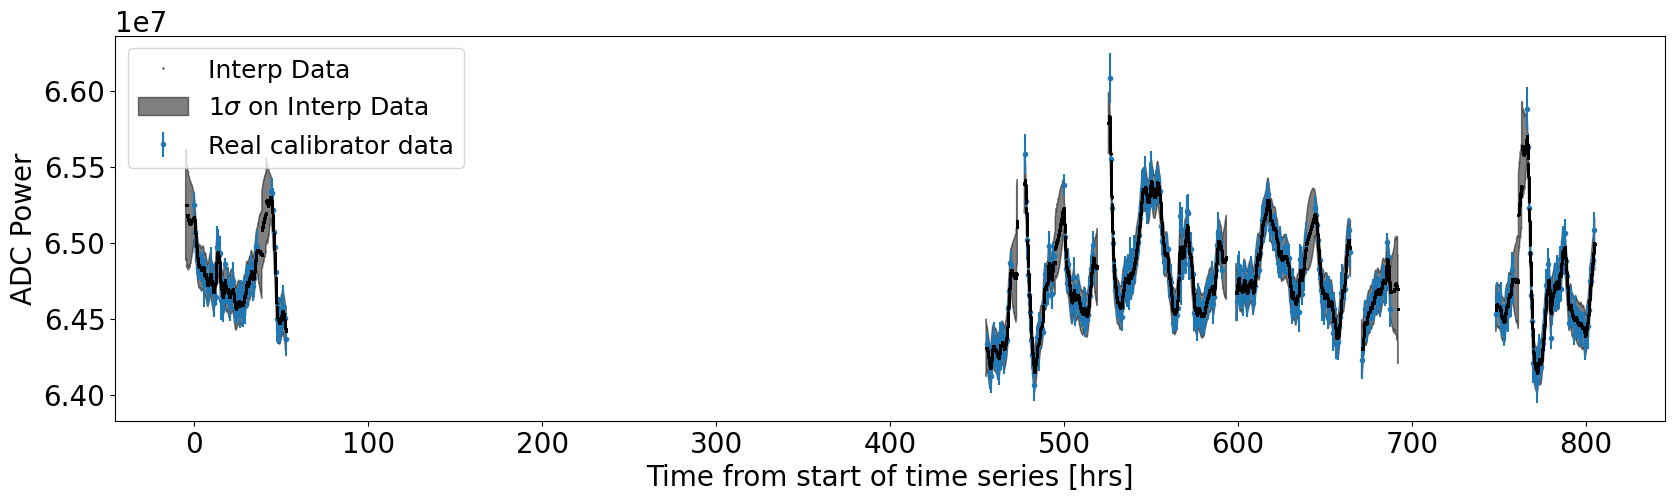

In [7]:
tmax=np.inf
tmin=0

ant_mask = (t_ant>tmin)&(t_ant<tmax)
tt_ant = t_ant[ant_mask]
llst_ant = lst_ant[ant_mask]
# -------------------------------

fig = plt.figure(figsize=(20,5))
# plt.rcParams.update({'font.size': 12})

# Select frequency ------
freq = 100 # MHz
freq_index = int(freq/freqstep)
# -----------------------

# Plot the averaged data with error bars
x = tt_ant
y1 = (short_interp[freq_index]-short_interp_err[freq_index])
y2 = (short_interp[freq_index]+short_interp_err[freq_index])

gap_threshold = 60*60 # 1h gap threshold
mask = np.ediff1d(x, to_begin=0) > gap_threshold

# fill_mask = (tt_ant < 1.6355e9)|(tt_ant > 1.6365e9)

x_masked = np.ma.masked_where(mask, x)
y1_masked = np.ma.masked_where(mask, y1)
y2_masked = np.ma.masked_where(mask, y2)

plt.rcParams.update({'font.size': 20})
plt.errorbar(x=(short_times_avgd[freq_index]-short_times_avgd[freq_index,0])/3600,y=short_data_avgd[freq_index],yerr=short_data_std[freq_index],marker='.',label='Real calibrator data',ls='none',zorder=1)

# Plot the results of the interpolation at antenna times
plt.plot((tt_ant-short_times_avgd[freq_index,0])/3600,short_interp[freq_index],'.',ms=1,label='Interp Data',color='k',zorder=2)
# plt.fill_between(tt_ant,(short_interp[freq_index]-short_interp_err[freq_index]),(short_interp[freq_index]+short_interp_err[freq_index]),alpha=0.5,color='k',zorder=0,label=r'1$\sigma$ on Interp Data')
plt.fill_between((x_masked-short_times_avgd[freq_index,0])/3600,y1_masked,y2_masked,alpha=0.5,color='k',zorder=0,label=r'1$\sigma$ on Interp Data')
# plt.axvline(x=tt_ant[12000])

# plt.ylim(bottom=7e7)
plt.xlabel('Time from start of time series [hrs]')
plt.ylabel('ADC Power')
plt.rcParams.update({'font.size': 18})
plt.legend()
# plt.title('Interpolation Results for a Subset of '+year+' '+instrument+' '+channel+' Data\nFrequency Channel = '+str(freq)+'MHz')
# plt.plot(tt_ant,[6.6e7 for ti in tt_ant],'.',color='red',label='Antenna times (interp times)')
# plt.xlim(left= 1.6365e9,right=1.63755e9)
# plt.xlim(left=-40,right=60)
# plt.ylim(top=6.9e7,bottom=6.4e7)
# plt.xlim(left=450)
# plt.savefig('InterpRslt3',bbox_inches='tight',dpi=300)
plt.show()

(165328,)
(4096, 154435)


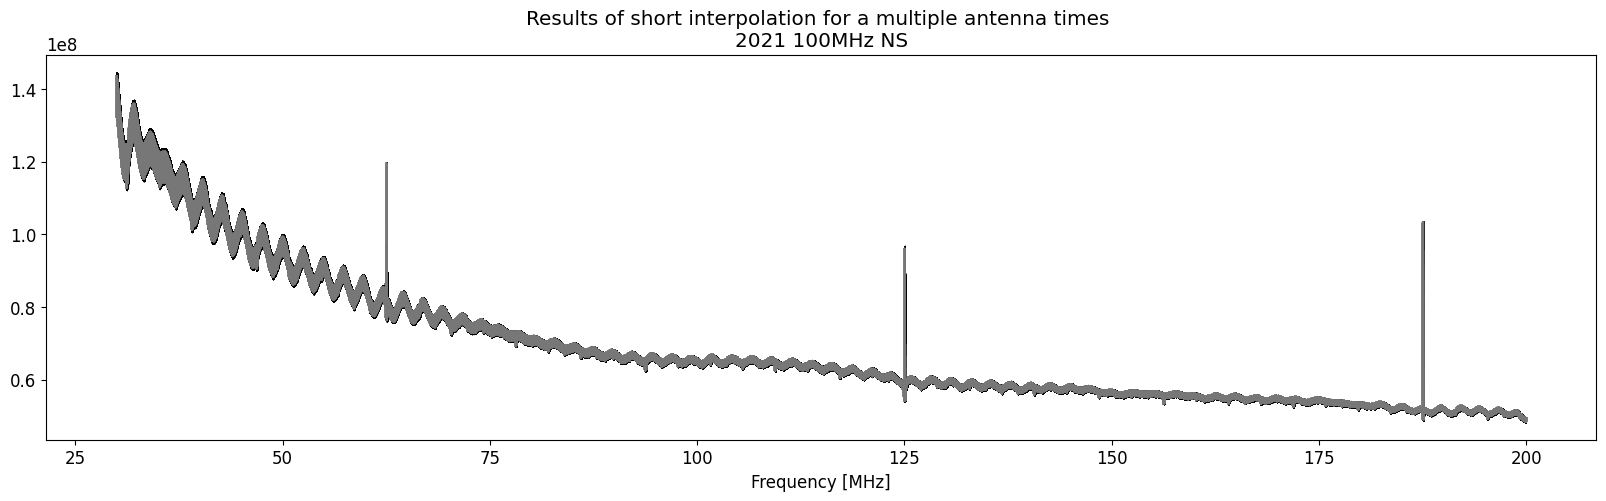

In [104]:
# Power vs. freq at a certain time
fig = plt.figure(figsize=(20,5))

# Frequency range
minfreq = 30
maxfreq = 200
minfreqarg = int(minfreq/freqstep)
maxfreqarg = int(maxfreq/freqstep)

# Plot single time
# time_index = 12000
# plt.plot(freqarr,short_interp[:,time_index])
# plt.fill_between(freqarr,(short_interp[:,time_index]-short_interp_err[:,time_index]),(short_interp[:,time_index]+short_interp_err[:,time_index]),alpha=0.5,color='k',zorder=0,label=r'1$\sigma$ on Interp Data')
# plt.title('Results of short interpolation for a single antenna time \n'+year+' '+instrument+' '+channel+'\nUNIX Time ='+'{:.4e}'.format(tt_ant[12000])+'s')

# Plot all spectra
nonan_mask = ~np.all(np.isnan(short_interp),axis=0)
print(nonan_mask.shape)
short_interp_masked = short_interp[:,nonan_mask]
short_interp_err_masked = short_interp_err[:,nonan_mask]
print(short_interp_masked.shape)

for time_index in range(short_interp_masked.shape[1]):
    #if time_index == 1000: break
    plt.plot(freqarr[minfreqarg:maxfreqarg],short_interp_masked[minfreqarg:maxfreqarg,time_index],color='grey',alpha=0.1)
    plt.fill_between(freqarr[minfreqarg:maxfreqarg],(short_interp_masked[minfreqarg:maxfreqarg,time_index]-short_interp_err_masked[minfreqarg:maxfreqarg,time_index]),(short_interp_masked[minfreqarg:maxfreqarg,time_index]+short_interp_err_masked[minfreqarg:maxfreqarg,time_index]),alpha=0.1,color='k',zorder=0)
# plt.axhline(y=6.53e7)
plt.xlabel('Frequency [MHz]')
# plt.yscale('log')
plt.title('Results of short interpolation for a multiple antenna times \n'+year+' '+instrument+' '+channel)
# plt.ylim(top=0.2e9)
# plt.ylim(top=0.2e9,bottom=4e7)
# plt.xlim(left=20,right=220)
# plt.legend()
plt.show()

In [337]:
import data_utils as du
from importlib import reload
reload(du)

<module 'data_utils' from '/gpfs/fs1/home/s/sievers/lauriea/prizm-analysis/data_utils.py'>

In [ ]:
# Transpose short_interp so dim1 = time and dim2 = freq
short_interp_masked = short_interp[:,nonan_mask]
lst_ant_masked = lst_ant[nonan_mask]
print(short_interp_masked.shape)
print(lst_ant_masked.shape)

/gpfs/fs1/home/s/sievers/lauriea/prizm-analysis/data_utils.py:189: RuntimeWarning: Mean of empty slice
  lst_split, data_split = LST_days_split(lst,data) # Looks for end of cycles in the LST array (i.e. when it goes from ~24h -> ~0h)


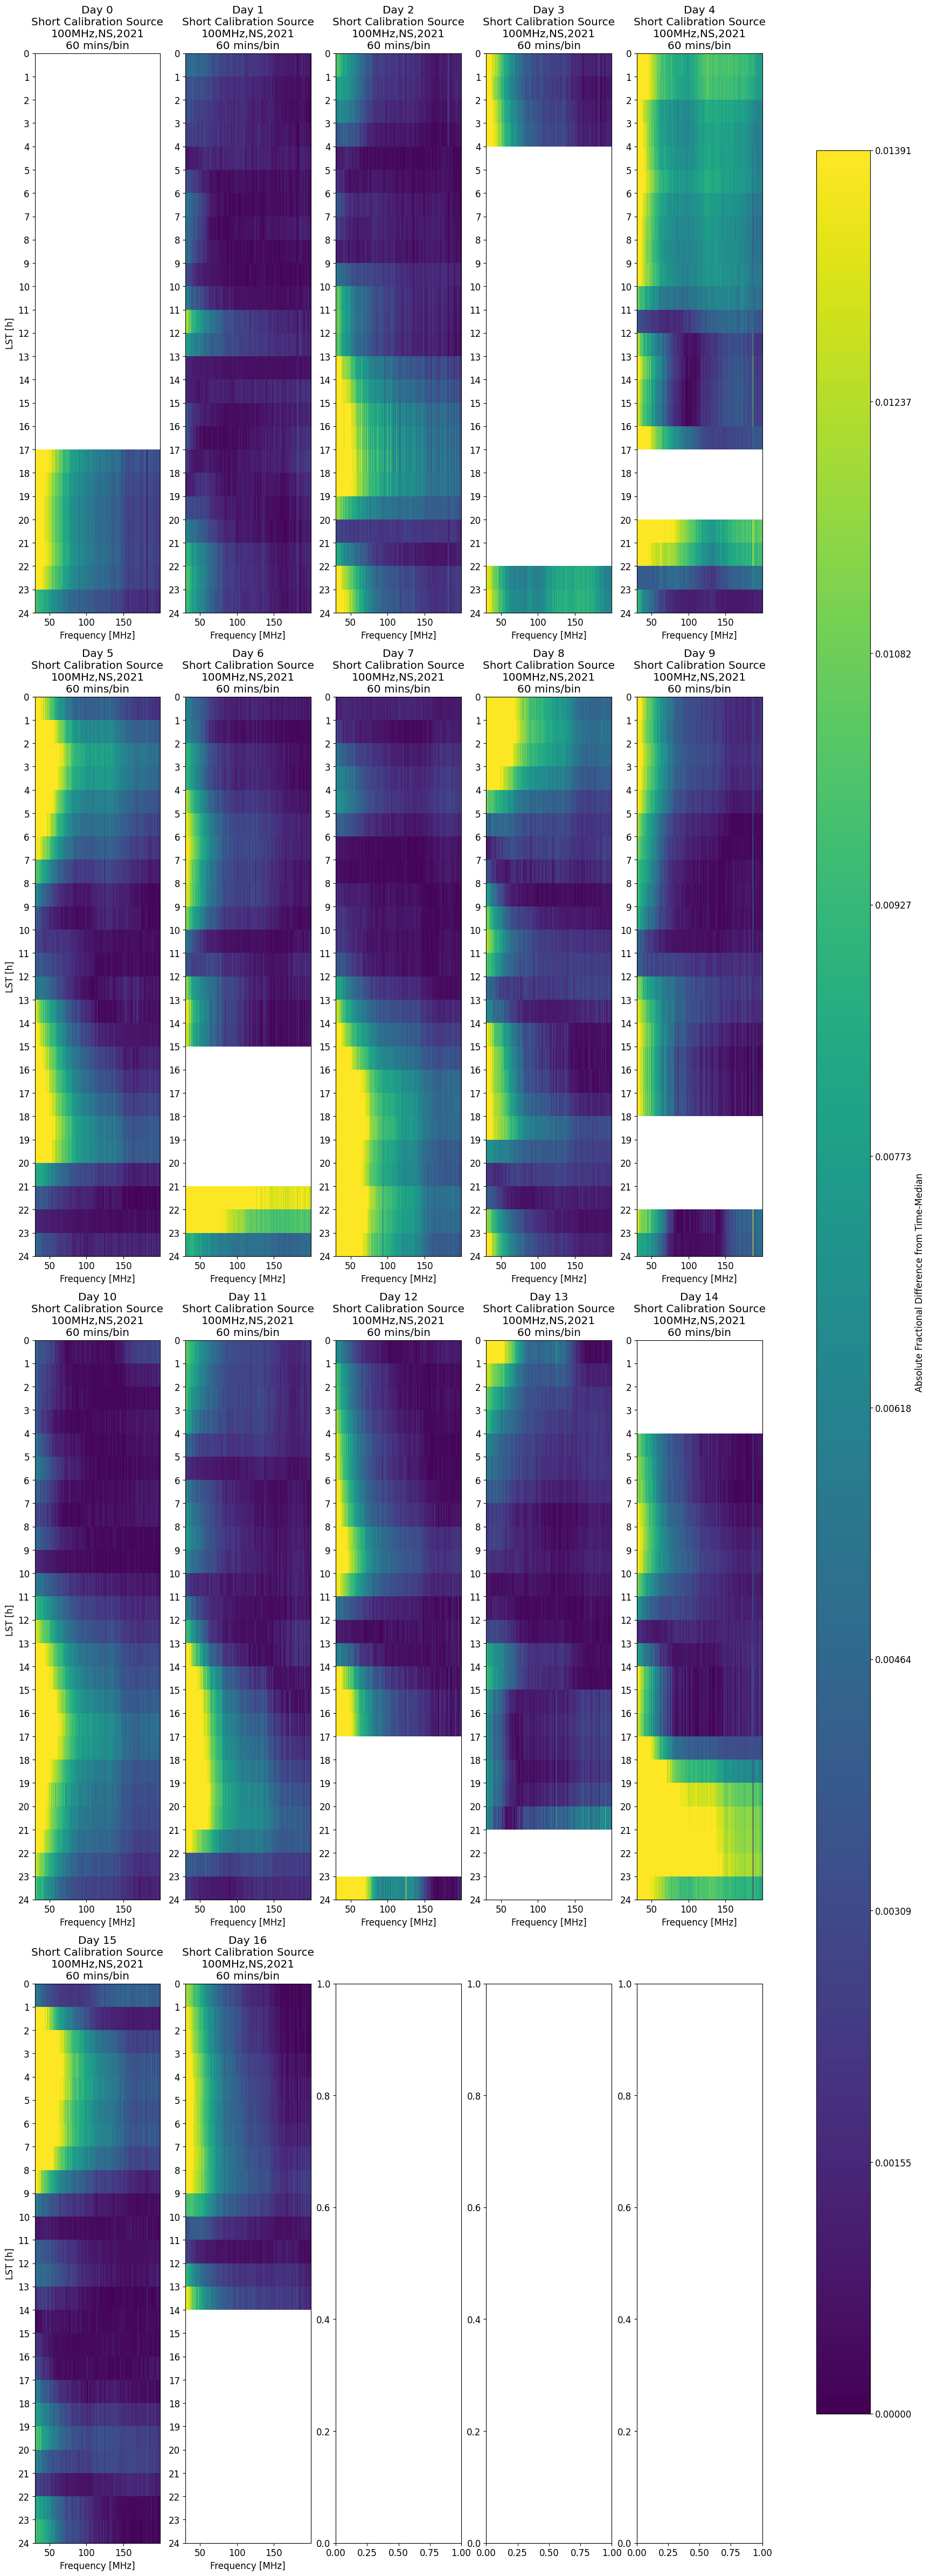

In [338]:
# Generate the plot??
# save_data_binned, lst_split_bins, save_data_unbinned, save_lst_unbinned, bin_inds = # troubleshooting
du.time_variation(short_interp_masked.T,lst_ant_masked,freqarr,year=year,instrument=instrument,channel=channel,source='Short',plot_type='waterfall')